In [18]:
from seaborn import color_palette, scatterplot as scatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

In [19]:
yahoo = pd.read_csv("yahoo Finanace_industry - Stock Market.csv", index_col=0).drop("Price", axis=1)

yahoo["market cap"] = yahoo["market cap"].str.replace("B", "", regex=False).astype(float)
# yahoo["Change"] = np.log1p(yahoo["Change"] / 100)

#infer pe ratio
test_mask = yahoo.PE_ratio.isna()
yahoo["_isinferred_PE_ratio"] = test_mask
subset = yahoo[["Change", "market cap", "PE_ratio"]]
train = subset[~test_mask]
test = subset[test_mask]
reg = RandomForestRegressor(random_state=42)
X = train.drop("PE_ratio", axis=1)
y = train.PE_ratio
reg.fit(X, y)
yahoo.loc[test_mask, "PE_ratio"] = reg.predict(test.drop("PE_ratio", axis=1))
#check inference
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

yahoo.sample(10, random_state=42)

0.9981938074132708


,Name,Change,market cap,PE_ratio,_isinferred_PE_ratio
Symbol,,,,,
BRK-B,Berkshire Hathaway Inc.,-1.38,709.361,18.9425,True
KKR,KKR & Co. Inc.,-0.24,54.738,31.1522,True
KKR,KKR & Co. Inc.,-0.24,54.732,31.1522,True
KKR,KKR & Co. Inc.,-0.26,54.732,46.8219,True
KKR,KKR & Co. Inc.,-0.26,54.731,46.8219,True
...,...,...,...,...,...
BAC-PL,Bank of America Corporation,0.79,0.000,325.7700,False
BAC-PL,Bank of America Corporation,0.79,0.000,325.7700,False
BAC-PL,Bank of America Corporation,0.79,0.000,325.7700,False


  0%|          | 0/3 [00:00<?, ?it/s]

[1.] [3.73493614 4.06065176 2.60962481] []


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

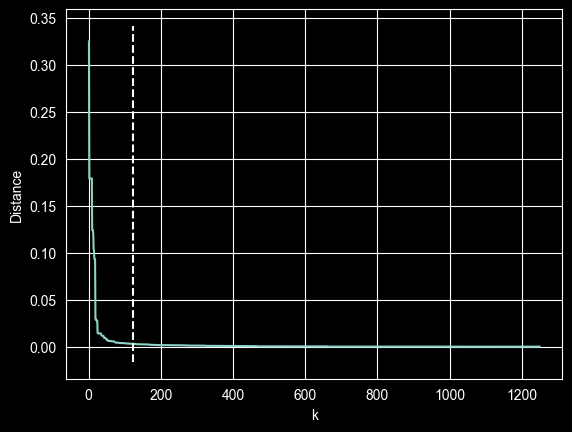

[0.12054858 0.91640819 0.38478829 0.76090725 0.76090725 0.64765261
 0.86133061 0.93941306 0.86133061]


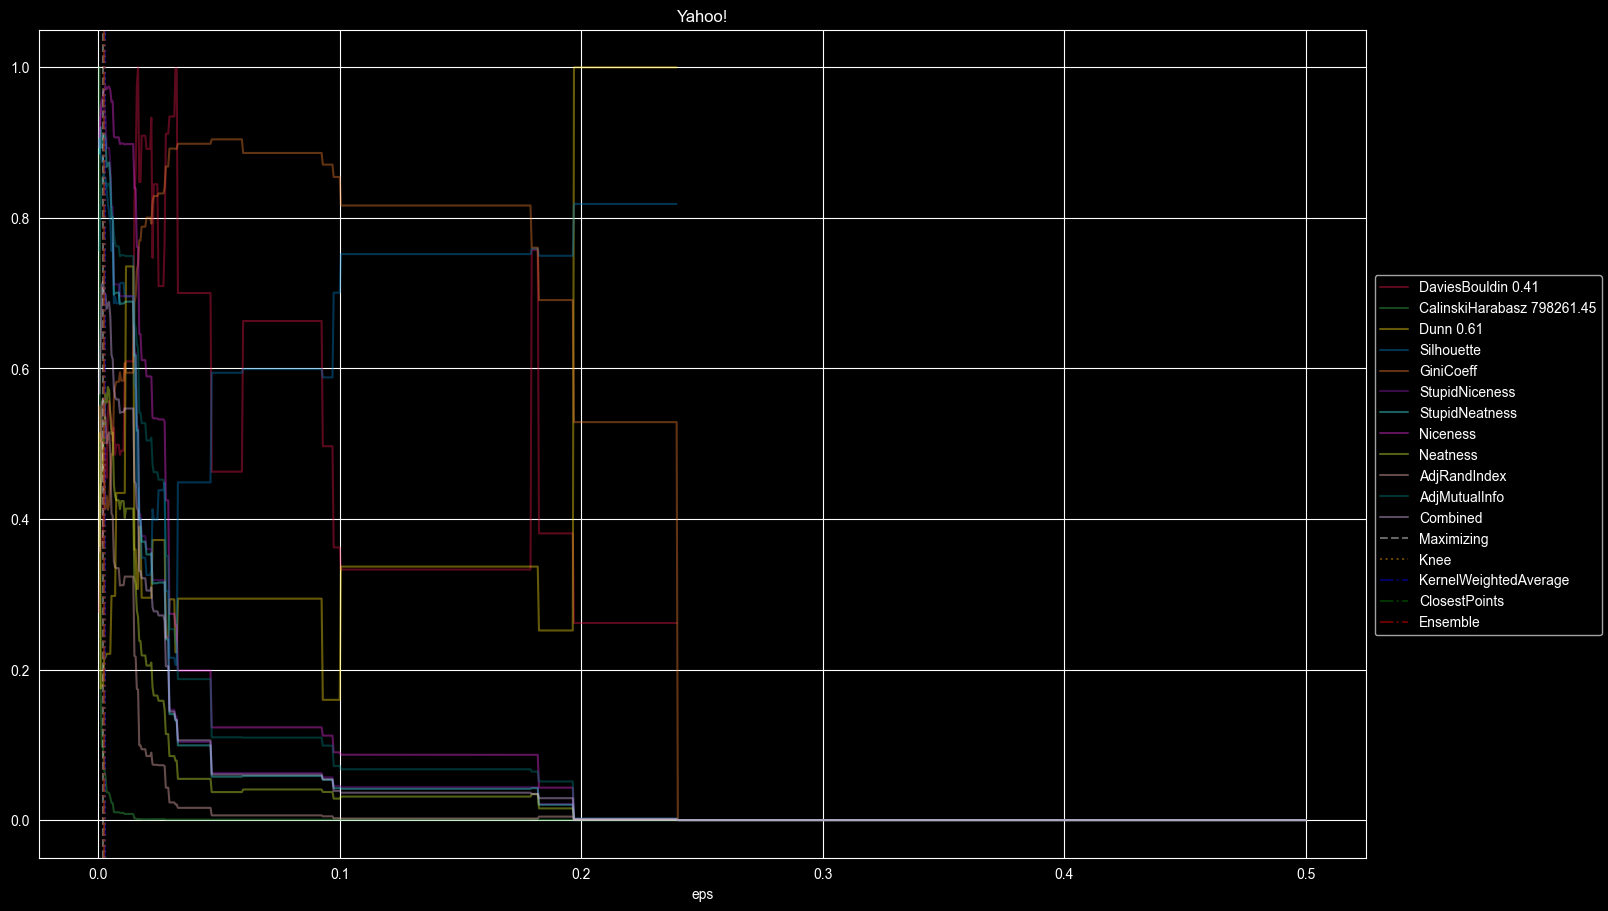

{'Silhouette': 0.8798592176050167, 'Niceness': 0.9617987322603135, 'GiniCoeff': 0.4743107668307378, 'Neatness': 0.49015024749613695, 'StupidNiceness': 0.9464579901153213, 'StupidNeatness': 0.899067005937235, 'sample': {'eps': 0.002, 'min_samples': 1}, 'counts_dict': {1: 9, 2: 7, 3: 7, 4: 2, 5: 4, 6: 3, 7: 2, 8: 3, 9: 1, 10: 5, 11: 3, 12: 2, 13: 2, 14: 1, 15: 1, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 4, 23: 3, 24: 4, 25: 13, 50: 1, 101: 1}, 'DaviesBouldin': 0.15952219860515604, 'CalinskiHarabasz': 76472.42770281418, 'Dunn': 0.10834815652863974, 'AdjRandIndex': 0.5592935600137117, 'AdjMutualInfo': 0.8569323901783884, 'Combined': 0.7153900319458764}
Name
Morgan Stanley                            147
The Goldman Sachs Group, Inc.             125
Wells Fargo & Company                     118
Bank of America Corporation                99
U.S. Bancorp                               55
Royal Bank of Canada                       49
Citigroup Inc.                             45
The Charles

In [27]:
yahoo_ = optimize_dbscan(yahoo.drop("Name", axis=1), "Yahoo!", yahoo.Name,  # weight_num=[5, 18, 76],
                         factor=0.25, n_iter=500, precomputed=True, chunksize=20)

In [28]:
yahoo_[1][1]


,AdjMutualInfo,AdjRandIndex,Combined
Metric,,,
DaviesBouldin,0.626636,0.173329,0.411066
CalinskiHarabasz,0.762123,0.334612,0.558820
Dunn,0.749246,0.323413,0.546741
Silhouette,0.856932,0.559294,0.715390
Knee,0.847216,0.533693,0.698120
GiniCoeff,0.109988,0.006257,0.060659
StupidNiceness,0.856932,0.559294,0.715390
StupidNeatness,0.814063,0.432337,0.632533
Niceness,0.847216,0.533693,0.698120


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(yahoo.Name)
X_train, X_test, y_train, y_test = train_test_split(yahoo.drop("Name", axis=1), le.transform(yahoo.Name), random_state=42)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)


0.9997055192565368


PE_ratio                0.764133
market cap              0.184708
Change                  0.050945
_isinferred_PE_ratio    0.000214
dtype: float64